In [ ]:
### INFLUENCERS IN SOCIAL MEDIA USING TWITTER DATA

In [379]:
### import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize



In [380]:
### read train data 
train_data = pd.read_csv('train.csv')

print(train_data.info())
train_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
Choice                 5500 non-null int64
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions_sent        5500 non-null float64
B_retweets_sent        5500 non-null float64
B_posts                5500 non-null float64
B_network

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


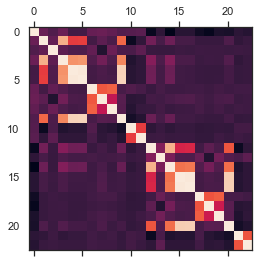

In [381]:
### plot the correlation to see which features are correlated
plt.matshow(train_data[1:].corr())
plt.show()

In [382]:
import seaborn as sns
sns.set(style="white")
corr = train_data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)


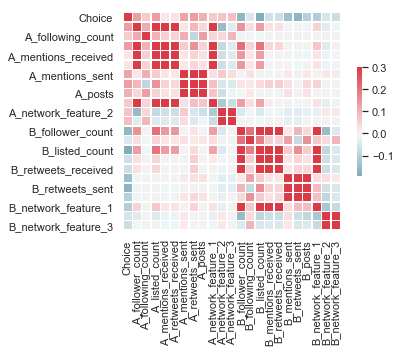

In [383]:

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [384]:
### look at train data info like column data types and any missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
Choice                 5500 non-null int64
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions_sent        5500 non-null float64
B_retweets_sent        5500 non-null float64
B_posts                5500 non-null float64
B_network

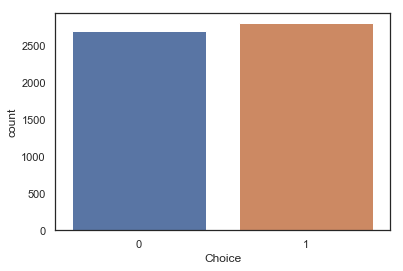

In [385]:
### plot count of choice for 0/1
import seaborn as sns
sns.countplot(train_data['Choice'], label = 'Influencer')


In [386]:
### choosing only few columns as these are highly correlated
X_train_A = train_data[['A_follower_count','A_mentions_received','A_retweets_received']]
X_train_B = train_data[['B_follower_count','B_mentions_received','B_retweets_received']]
y =train_data['Choice']
print(X_train_A.head(), '\n')
print(X_train_B.head())



   A_follower_count  A_mentions_received  A_retweets_received
0               228             0.583979             0.100503
1             21591            90.456506            25.798292
2              7310            25.503644             9.556347
3                20             7.690824             0.277306
4             45589           148.854279            36.998884 

   B_follower_count  B_mentions_received  B_retweets_received
0             34463            15.430498             3.984029
1             39262            40.495021             8.943607
2              3622             0.734696             0.354379
3             19562           572.874856           390.293681
4              7554            21.601866             3.581661


In [387]:
y_train = np.array(y_train)
#print(y_train)
X_train_A = np.array(X_train_A)
X_train_B = np.array(X_train_B)

In [388]:
### to convert to log scale 
def trans_feat(X):
    return np.log(1+X)
    

In [389]:
### transform features 
X_train = trans_feat(X_train_A)-trans_feat(X_train_B)
X_train

array([[-5.01394858, -2.33919894, -1.51047089],
       [-0.59795972,  0.79029008,  0.99140832],
       [ 0.70207765,  2.72645031,  2.05338436],
       ...,
       [ 0.71124841,  0.92490556,  1.62733314],
       [-0.19596371,  1.27117709,  2.35943389],
       [-6.68621021, -4.14742096, -4.48570762]])

In [390]:
### build model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [391]:
### read test data 
test_data = pd.read_csv('test.csv')
test_data.head()






,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493


In [392]:
X_test_A = test_data[['A_follower_count','A_mentions_received','A_retweets_received']]
X_test_B = test_data[['B_follower_count','B_mentions_received','B_retweets_received']]
print(X_test_A.head(), '\n')
print(X_test_B.head())


   A_follower_count  A_mentions_received  A_retweets_received
0            614689           199.618296            67.812469
1            739581           102.026750            96.771319
2              3638             2.793577             1.402703
3               613             1.326041             0.356943
4           1352348         19129.848662         14552.733991 

   B_follower_count  B_mentions_received  B_retweets_received
0           1404323           967.720642           579.431128
1            756715            38.260522            10.697567
2            488750          1207.190077           599.721600
3             13456            10.300222             3.828561
4           1481379          9902.070379          5012.055876


In [393]:
X_test_A = np.array(X_test_A)
X_test_B = np.array(X_test_B)

In [394]:
### to convert to log scale 
def trans_feat(X):
    return np.log(1+X)
    

In [395]:
X_test = trans_feat(X_test_A)-trans_feat(X_test_B)
X_test

array([[-0.82619325, -1.5745722 , -2.13238618],
       [-0.02290286,  0.96476917,  2.12325037],
       [-4.90014424, -5.76356929, -5.5215374 ],
       ...,
       [ 0.61424567,  1.06438845,  0.15695251],
       [ 0.0848572 ,  0.72617588,  0.88134271],
       [ 0.04419081, -0.97318125, -0.8166664 ]])

In [396]:
### predict the lables based on x_test and convert them into lables
y_pred = model.predict(X_test)


labels={0:'B' , 1: 'A'}

for i in y_pred:
    pred_influencer = labels[i]
    print(pred_influencer)


B
A
B
B
A
B
A
A
B
A
B
A
A
B
A
A
A
B
A
B
A
B
A
A
B
B
B
B
B
A
B
A
A
A
A
A
B
B
A
B
A
B
B
A
B
A
A
B
B
B
B
B
B
B
A
B
B
A
B
A
B
A
B
B
A
B
A
B
A
A
A
B
B
B
B
A
A
A
B
B
B
B
B
A
B
B
B
B
A
A
B
B
A
A
B
A
A
A
B
A
B
A
A
B
B
A
B
B
B
A
B
B
A
B
A
A
A
A
A
A
A
A
B
A
A
A
A
B
B
A
B
B
B
A
B
A
A
B
A
A
A
A
A
A
B
B
B
B
B
A
B
B
A
A
A
B
A
A
A
B
B
B
A
B
B
A
A
A
B
B
B
B
B
B
B
B
B
A
A
A
B
B
A
B
B
A
B
B
A
A
A
A
B
A
A
A
A
A
A
A
A
A
B
A
A
B
B
A
B
B
A
A
A
A
A
B
A
A
A
B
A
A
B
B
B
B
A
B
A
B
B
B
B
A
A
B
B
A
A
A
A
A
A
A
B
A
B
A
A
B
A
A
A
B
B
B
B
B
B
A
B
A
A
A
A
A
A
B
A
A
B
A
A
B
A
B
A
A
A
B
B
A
A
A
A
A
B
A
A
B
A
A
A
B
A
B
A
A
A
A
B
B
B
B
A
B
B
A
A
B
B
B
B
A
A
A
A
B
B
A
A
A
B
A
A
B
B
A
A
A
B
B
A
B
A
A
A
A
A
A
A
A
A
B
B
B
A
B
A
B
A
A
B
B
B
A
A
A
B
A
A
A
A
B
A
B
B
A
A
A
B
B
A
B
A
A
A
A
B
B
B
A
A
A
B
A
B
B
A
A
A
B
B
B
A
B
A
A
A
B
A
A
B
B
A
A
A
A
A
B
B
A
B
A
A
B
B
B
A
A
B
B
A
B
B
A
A
B
A
A
B
B
A
B
A
A
A
B
B
A
A
A
B
B
A
A
B
A
B
B
B
A
A
A
A
B
B
B
B
B
A
A
A
B
B
B
B
A
A
A
A
A
A
B
B
B
A
A
A
A
A
A
B
A
A
B
B
B
A
B
B
B
A
B
A
A
A
A
A
A


A
B
B
A
A
B
A
B
A
A
A
A
A
B
B
B
B
A
A
A
B
A
B
B
B
A
B
B
B
B
A
A
B
B
B
A
B
A
B
A
A
B
B
A
B
A
A
B
A
A
A
A
B
B
A
B
A
B
B
A
B
A
B
A
A
A
B
B
A
B
A
B
A
A
B
B
A
A
B
A
A
A
B
B
A
B
B
A
A
B
A
A
B
B
A
A
A
A
B
A
B
A
A
B
B
A
B
A
A
A
A
B
B
A
A
B
A
B
A
B
A
B
B
A
B
A
A
A
A
A
A
B
A
A
A
A
A
A
B
B
B
A
B
B
B
A
A
B
A
A
B
B
B
A
B
B
B
B
A
B
A
A
A
B
A
B
A
B
A
B
A
A
A
B
B
B
A
A
A
A
B
A
A
B
B
B
B
A
A
B
A
B
A
A
A
A
A
B
A
B
B
A
A
B
A
B
A
B
B
A
B
B
A
A
B
A
A
B
B
B
A
A
B
A
A
B
B
B
A
A
A
A
A
B
A
B
A
B
B
B
A
A
B
B
A
A
A
B
A
B
B
B
A
B
B
A
B
A
A
B
A
A
A
B
A
A
A
A
A
B
A
B
A
B
A
A
B
B
A
B
A
B
B
A
B
A
B
B
A
B
A
A
A
A
B
B
B
B
A
A
A
B
B
A
A
A
A
B
A
B
A
A
A
A
B
B
B
A
A
B
B
A
A
A
B
A
B
A
B
B
B
B
A
B
B
B
A
A
A
B
A
A
A
A
A
A
A
A
A
B
A
B
A
B
B
A
B
B
A
A
B
A
A
A
B
B
B
A
B
A
A
B
A
A
B
B
B
A
A
A
A
B
A
A
A
B
A
A
A
A
A
A
B
B
B
A
A
B
B
B
B
B
B
B
A
B
B
B
B
A
A
B
B
A
A
B
B
B
B
B
B
A
B
A
A
A
B
A
B
A
B
B
B
B
A
B
A
B
B
B
B
A
B
B
B
B
A
B
B
A
A
A
B
B
A
A
B
A
A
A
B
B
A
A
A
A
B
B
B
B
B
B
A
A
B
B
B
A
A
B
B
A
A
B
B
A
B
B
B
B
B
B
B
B
A
A
B
A
B
A


In [397]:
### read sample prediction data to calculate metrics
y_pred_data = pd.read_csv('sample_predictions.csv')
y_predt_data.head()

,Id,Choice
0,1,0.315025
1,2,0.474330
2,3,0.098802
3,4,0.137932
4,5,0.523677


In [398]:
### set threshold of 0.5 and mark as 0/1
y_test = []

for line in y_test_data['Choice'] :
    val = float(line)
    if val > 0.5:
        y_test.append(1)
    else:
        y_test.append(0)
        
y_test[:20]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]

In [399]:
### model performance metrics
roc_score = roc_auc_score(y_test,y_pred)
roc_score

0.918720921146709

In [400]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9188508064516129

In [418]:
logistic_report = classification_report(y_test , y_pred)
logistic_confusion_matrix = confusion_matrix(y_test , y_pred)
print('Logistic Report' ,logistic_report )
print('Logistic Regression confucion matrix', logistic_confusion_matrix)

Logistic Report               precision    recall  f1-score   support

           0       0.93      0.90      0.92      2954
           1       0.91      0.94      0.92      2998

   micro avg       0.92      0.92      0.92      5952
   macro avg       0.92      0.92      0.92      5952
weighted avg       0.92      0.92      0.92      5952

Logistic Regression confucion matrix [[2662  292]
 [ 191 2807]]


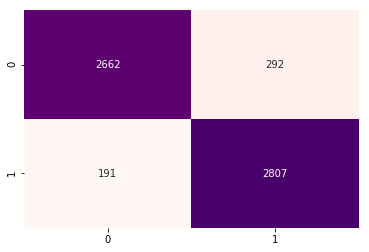

In [314]:
### plot confusion matrix to see the no.of labels classified true/false
import seaborn as sns

sns.heatmap(logistic_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [336]:
### model build using random forest
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier()

random_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [359]:
random_clf_pred = random_clf.predict(X_test)
random_clf_pred[:10]


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [404]:
accuracy = accuracy_score(y_test, random_clf_pred)
classifier_report = classification_report(y_test , random_clf_pred)
random_forest_confusion_matrix = confusion_matrix(y_test , random_clf_pred)
print('Accuracy' , accuracy)


Accuracy 0.8237567204301075


In [405]:
print('Classification Report', classifier_report)
print('confusion matrix', random_forest_confusion_matrix)


Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.83      2954
           1       0.84      0.80      0.82      2998

   micro avg       0.82      0.82      0.82      5952
   macro avg       0.82      0.82      0.82      5952
weighted avg       0.82      0.82      0.82      5952

confusion matrix [[2496  458]
 [ 591 2407]]


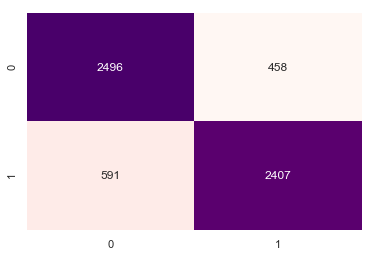

In [406]:
import seaborn as sns

sns.heatmap(random_forest_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [420]:
### model build using SVM linear kernel
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [412]:
svm_clf_pred = svm_model.predict(X_test)
svm_clf_pred[:10]


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [415]:
accuracy = accuracy_score(y_test, svm_clf_pred)
svm_classifier_report = classification_report(y_test , svm_clf_pred)
svm_confusion_matrix = confusion_matrix(y_test , svm_clf_pred)
print('Accuracy' , accuracy)


Accuracy 0.9099462365591398


In [416]:
print('Classification Report', classifier_report)
print('confusion matrix', svm_confusion_matrix)


Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.83      2954
           1       0.84      0.80      0.82      2998

   micro avg       0.82      0.82      0.82      5952
   macro avg       0.82      0.82      0.82      5952
weighted avg       0.82      0.82      0.82      5952

confusion matrix [[2635  319]
 [ 217 2781]]


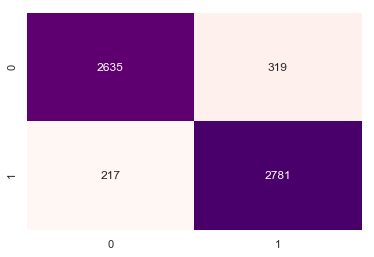

In [417]:
import seaborn as sns

sns.heatmap(svm_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()